# A naive implementation of a high-pass filter - SOLUTION

A high-pass filter (see introduction slides) is one where we remove content at low frequencies (below the high-pass). This might be done if you have noise at low frequencies but signal at higher frequencies and want to extract that signal.

Let's show this with a contrived example:

 * We will generate a dataset that is 8 seconds long sampled 16 times a second.
 * In this dataset we will add noise with frequencies up to 1Hz, but not above it.
 * We will also add a sine wave at 4Hz, but the amplitude will be much smaller than the noise.
 
In the time-domain the sine-wave is not visible above the low-frequency noise at all, but with a high-pass filter the signal can be easily extracted from the data because there is no overlap in the *frequency* components of the noise and the signal.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

We are going to need to use Fourier transforms again, so copy in your code from last week

In [2]:
def compute_fourier_transform(data_time_domain):
    return np.fft.fft(data_time_domain)


def compute_inverse_fourier_transform(data_frequency_domain):
    return np.fft.ifft(data_frequency_domain)

And then we generate the data as described.

In [3]:
# Choose data length and sampling rate
omega = 1. * (2*np.pi)
data_length = 8
sample_rate = 16
sample_points = int(data_length * sample_rate)
times = np.arange(sample_points) / sample_rate

np.random.seed(1024)
data_time_domain = np.zeros(sample_points)
# Add low frequency noise: No components above 1Hz
for i in range(1,(data_length+1)):
    omega = i / data_length * (2*np.pi)
    phase = np.random.random() * (2*np.pi)
    data_time_domain += 100*np.sin(times * omega + phase)

# Add in a single 4Hz sine wave
omega = 4. * (2*np.pi) 
signal = np.sin(times * omega)
data_time_domain += signal

## Exercise

Plot this data in the time domain. Can you see the 4Hz signal above the noise?

Text(0, 0.5, 'Amplitude')

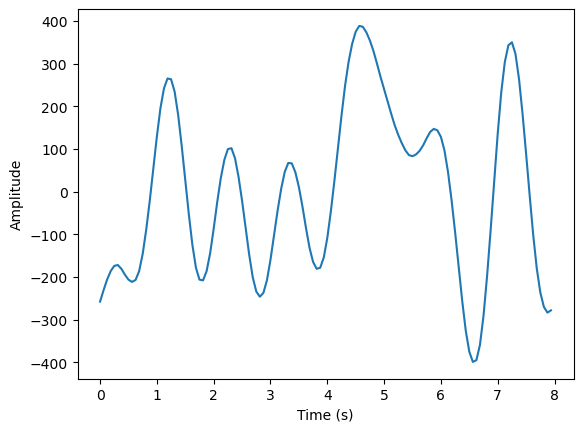

In [4]:
plt.plot(times, data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# You cannot see the data

## Exercise

Using your Fourier transform knowledge from the last class, transform to the frequency domain and plot the data in the frequency domain as well. Convert back to the time domain and verify that you get the original data.

To try to see the sine wave in the frequency domain plot the magnitude of the frequency domain data (remember it is complex) against frequency, and use a log y-axis (plt.semilogy).

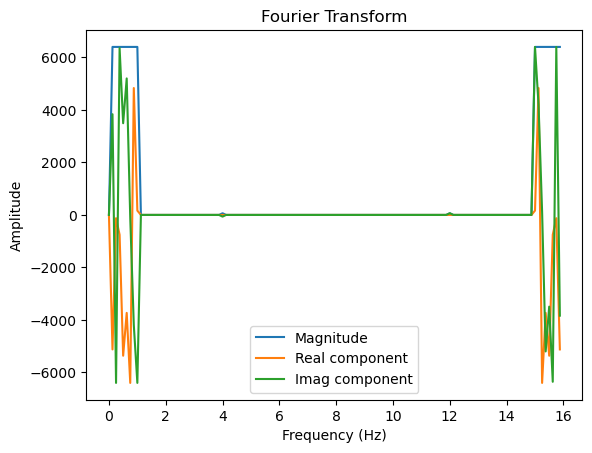

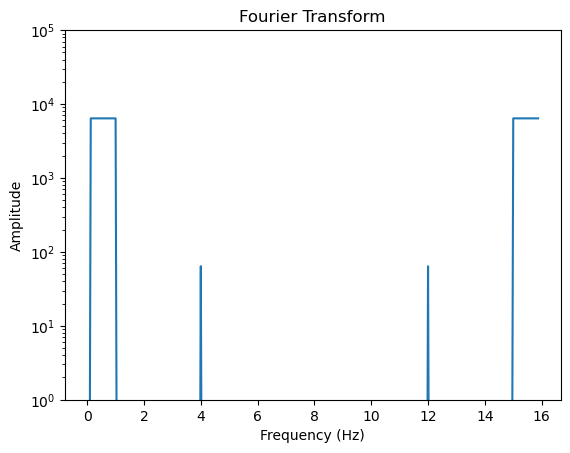

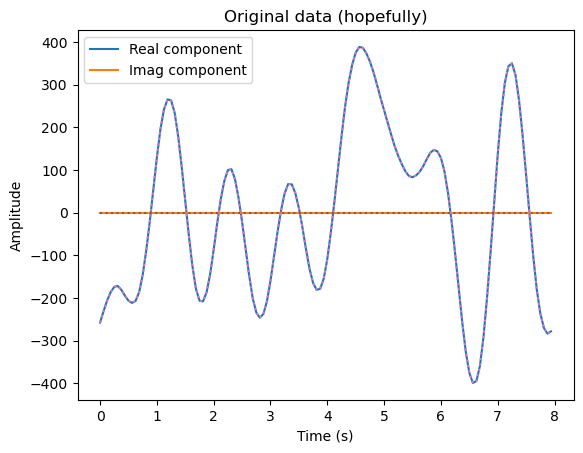

In [5]:
plt.figure()
frequencies = np.arange(sample_points) * (sample_rate/sample_points)
data_frequency_domain = compute_fourier_transform(data_time_domain)
plt.plot(frequencies, abs(data_frequency_domain))
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Magnitude', 'Real component','Imag component'])

plt.figure()
plt.semilogy(frequencies, abs(data_frequency_domain))
plt.ylim([1,100000])
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain.real, c='tab:blue')
plt.plot(times, data_time_domain.imag, c='tab:orange')
plt.plot(times, data_time_domain_inverted.real, c='tab:pink', linestyle=':')
plt.plot(times, data_time_domain_inverted.imag, c='tab:brown', linestyle=':')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

Hopefully you can see a spike in your frequency-domain plot corresponding to the signal. Now we need to high-pass filter the data to be able to extract the signal in the time domain.

First let's explore a simple approach to the problem. Fourier transform the data, set to 0 all content below 2Hz and then transform back to the time domain:

## Exercise

Carry out the instructions below

* Fourier transform the data and then zero out all content below 2Hz.
* Plot this data in the Fourier domain.
* Transform the data back to the time domain (using an inverse Fourier transform)
* Plot the filtered data in the time domain.
* Can you see the sine wave clearly now? (The answer should be "yes")

We have provided some hints below for doing this

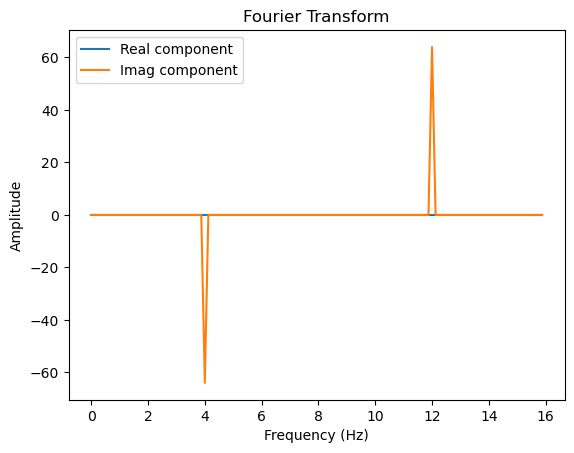

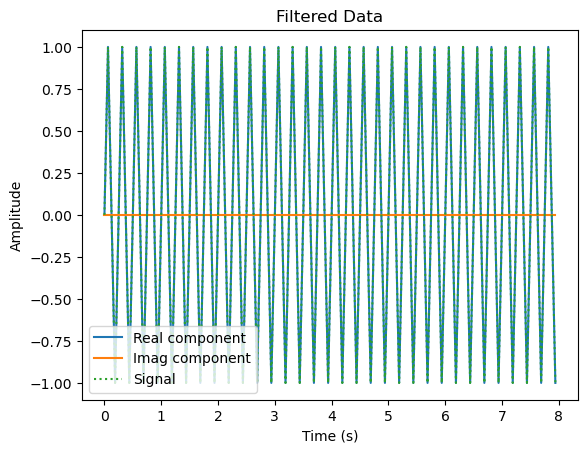

In [7]:
# Transform into the fourier domain
data_frequency_domain = compute_fourier_transform(data_time_domain)

# Set values below 2Hz to 0 (as this is symmetric we need to remove content at both small *and* large values)
# Remove content at low frequencies
data_frequency_domain[:2*data_length] = 0
# Zero out all data from max_frequency - 2Hz to max_frequency ... AS 16Hz is the max frequency this is 14 - 16Hz.
data_frequency_domain[-(2*data_length):] = 0

# Make the plots requested
# frequency domain
plt.figure()
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_inverted.real, label='Real component',)
plt.plot(times, data_time_domain_inverted.imag, label='Imag component')
plt.plot(times, signal, linestyle=':', label='Signal')
plt.title('Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

At this point, applying a high-pass filter may appear to be very easy ... However, as we will see, there's more to it than this!